In [1]:
from tock import *

# Pushdown automata

For pushdown automata, Sipser uses multiple header rows, but we use only one. The PDA in Example 2.14 should be written as:


In [2]:
m = read_csv("examples/pda.csv")
m.display_table()

,"ε,$","ε,ε","1,0","0,ε"
>q1,,"q2,$",,
q3,"q4,ε",,"q3,ε",
q2,,,"q3,ε","q2,0"
@q4,,,,


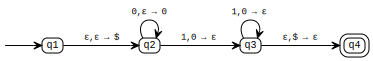

In [3]:
m.display_graph()

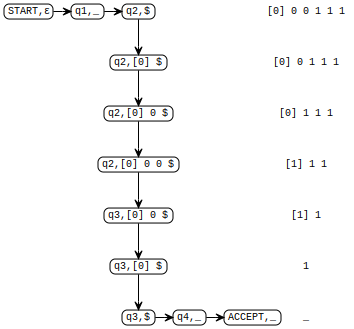

In [4]:
m.run("000111")

That's not very exciting, so let's try a PDA with nondeterminism.

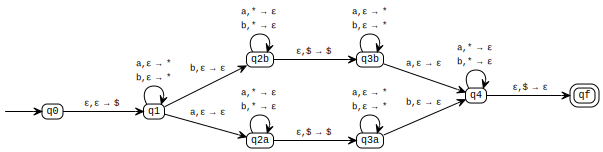

In [5]:
m = read_csv("examples/notww.csv")
m.display_graph()

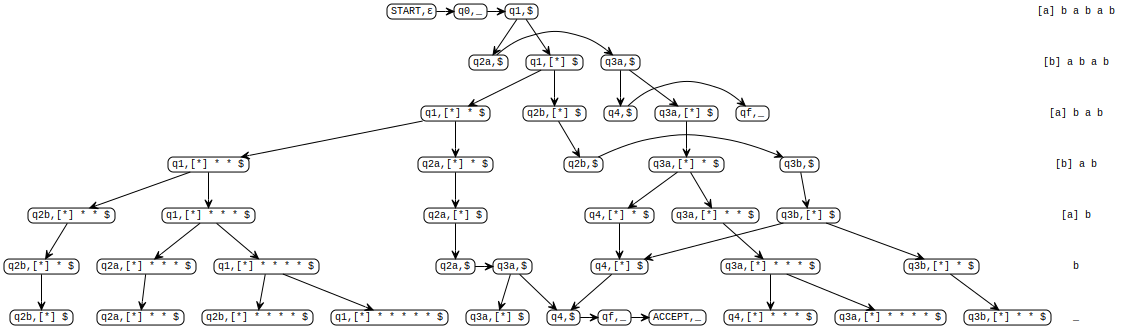

In [6]:
m.run("ababab")